In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.3829 - val_loss: 0.1891
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1795 - val_loss: 0.1531
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1488 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1313 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1199 - val_loss: 0.1125
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1119 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1068 - val_loss: 0.1025
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1030 - val_loss: 0.0994
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1001 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0980 - val_loss: 0.0956

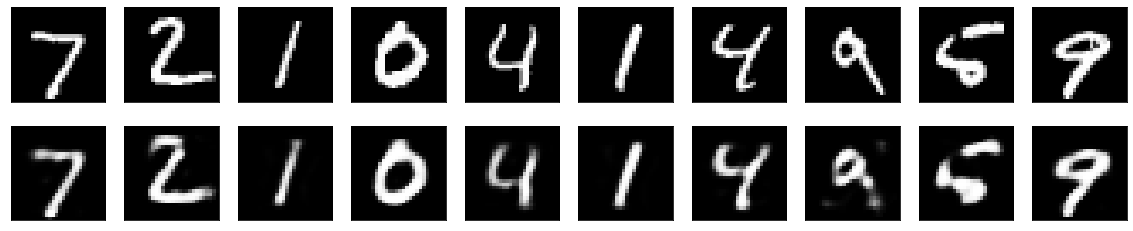

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [10]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [11]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3408 - val_loss: 0.1701
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1591 - val_loss: 0.1383
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1366 - val_loss: 0.1267
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1253 - val_loss: 0.1190
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1191 - val_loss: 0.1142
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1146 - val_loss: 0.1111
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1117 - val_loss: 0.1094
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1089 - val_loss: 0.1062
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1065 - val_loss: 0.1034
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1041 - val_lo

In [12]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [14]:
#tensorboard --logdir=/tmp/autoencoder

from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


Epoch 1/50
469/469 [==============================] - 34s 9ms/step - loss: 0.3247 - val_loss: 0.1451
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1397 - val_loss: 0.1255
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1244 - val_loss: 0.1172
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1165 - val_loss: 0.1120
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1122 - val_loss: 0.1085
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1089 - val_loss: 0.1054
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1059 - val_loss: 0.1035
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1041 - val_loss: 0.1016
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1024 - val_loss: 0.1005
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1015 - val_loss: 0.099

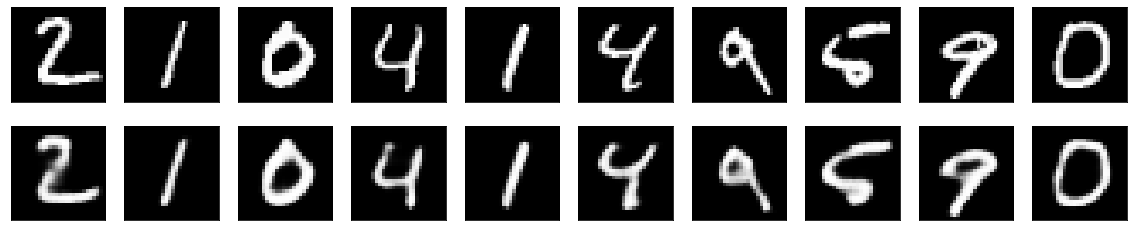

In [15]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

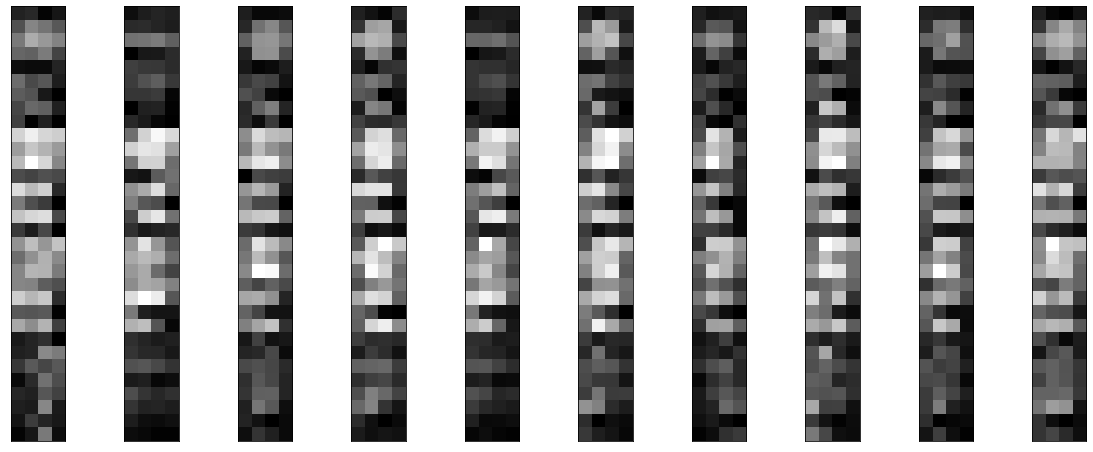

In [16]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

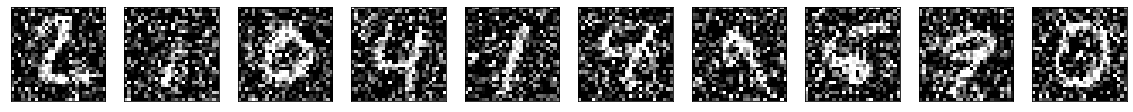

In [18]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 5s 9ms/step - loss: 0.2329 - val_loss: 0.1157
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1137 - val_loss: 0.1077
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1073 - val_loss: 0.1044
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1042 - val_loss: 0.1021
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1028 - val_loss: 0.1010
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1016 - val_loss: 0.1000
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1006 - val_loss: 0.0991
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0998 - val_loss: 0.0983
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0989 - val_loss: 0.0977
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0983 - val_lo

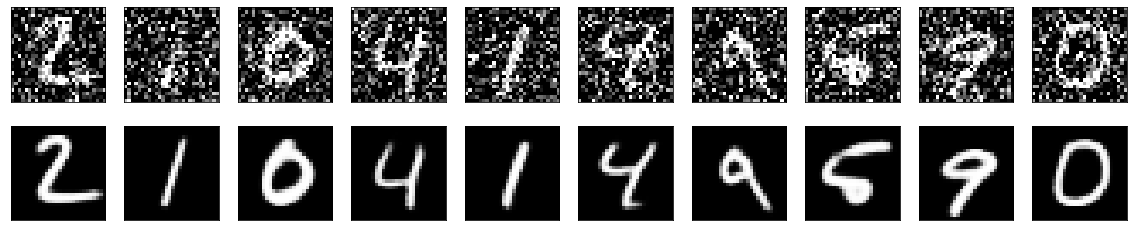

In [21]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)


In [23]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [24]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [25]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))


Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 225.0136 - val_loss: 167.8118
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 168.0390 - val_loss: 163.9603
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 163.9826 - val_loss: 161.4345
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 161.3055 - val_loss: 159.4635
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 158.8628 - val_loss: 157.6258
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 157.3427 - val_loss: 155.8259
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 155.4465 - val_loss: 154.7550
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 155.0095 - val_loss: 153.9631
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 153.6488 - val_loss: 153.4068
Epoch 10/100
1875/1875 [=============

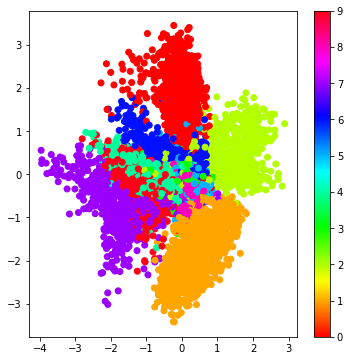

In [52]:
from keras.utils import to_categorical

x_test_encoded = encoder.predict(x_test, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0][:, 0], x_test_encoded[0][:, 1], c=y_test, cmap='hsv')
plt.colorbar()
plt.show()